In [1]:
import requests
import re
import time
import io

import pandas as pd
import datetime as dt
#import numpy as np
#import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
tradedays = 100
ticker = 'AAPL'
baseurl = 'https://query1.finance.yahoo.com/v7/finance/download'

In [3]:
url = 'https://finance.yahoo.com/quote/{0}/history'.format(ticker)
print 'URL =', url
r = requests.get(url)  # download page
cookie = r.cookies['B'] # the cookie we're looking for is named 'B'
print 'Cookie =', cookie

pattern = re.compile('.*"CrumbStore":\{"crumb":"(?P<crumb>[^"]+)"\}')
for line in r.text.splitlines():
    m = pattern.match(line)
    if m is not None:
        crumb0 = m.groupdict()['crumb']
        crumb = crumb0.decode('unicode-escape')
        if crumb0 != crumb:
            print 'Crumb0 =', crumb0
        break

print'Crumb =', crumb

URL = https://finance.yahoo.com/quote/AAPL/history
Cookie = eh6onsdcnfehp&b=3&s=3a
Crumb = AiFCXoPIOcq


In [4]:
enddt = dt.datetime.utcnow()
enddt = int(time.mktime(enddt.timetuple()))
tradedays = 100
startdt = int(enddt - tradedays * 24 * 60 * 60 * 7 / 4)
print 'Start Time = ', startdt
print 'End Time = ', enddt


Start Time =  1485923881
End Time =  1501043881


In [5]:
data = (baseurl, ticker, startdt, enddt, crumb)

url = "{0}/{1}?period1={2}&period2={3}&interval=1d&events=history&crumb={4}".format(baseurl, ticker, startdt, enddt, crumb)
print 'URL = ', url
df = pd.read_csv(io.StringIO(requests.get(url, cookies={'B':cookie}).text),index_col=0)

URL =  https://query1.finance.yahoo.com/v7/finance/download/AAPL?period1=1485923881&period2=1501043881&interval=1d&events=history&crumb=AiFCXoPIOcq


In [6]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-02-01,127.029999,130.490005,127.010002,128.750000,127.667236,111985000
2017-02-02,127.980003,129.389999,127.779999,128.529999,127.449089,33710400
2017-02-03,128.309998,129.190002,128.160004,129.080002,127.994469,24507300
2017-02-06,129.130005,130.500000,128.899994,130.289993,129.194290,26845900
2017-02-07,130.539993,132.089996,130.449997,131.529999,130.423859,38183800


In [7]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-07-19,150.479996,151.419998,149.949997,151.020004,151.020004,20923000
2017-07-20,151.500000,151.740005,150.190002,150.339996,150.339996,17243700
2017-07-21,149.990005,150.440002,148.880005,150.270004,150.270004,26252600
2017-07-24,150.580002,152.440002,149.899994,152.089996,152.089996,21304700
2017-07-25,151.800003,153.839996,152.240005,152.740005,152.740005,17040810


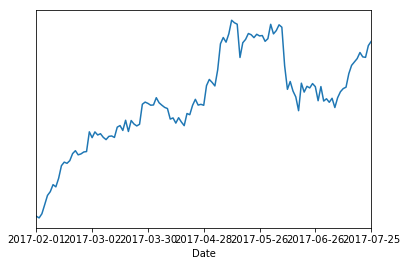

In [8]:
df['Adj Close'].plot(logy=True);